In [1]:
import tensorflow as tf 

import matplotlib.pyplot as plt
import numpy as np
import random

In [2]:
mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = (np.expand_dims(train_images, axis=-1)/255.).astype(np.float32)
train_labels = (train_labels).astype(np.float32)
test_images = (np.expand_dims(test_images, axis=-1)/255.).astype(np.float32)
test_labels = (test_labels).astype(np.float32)

In [3]:
EPOCHS = 30
BATCH_SIZE = 64

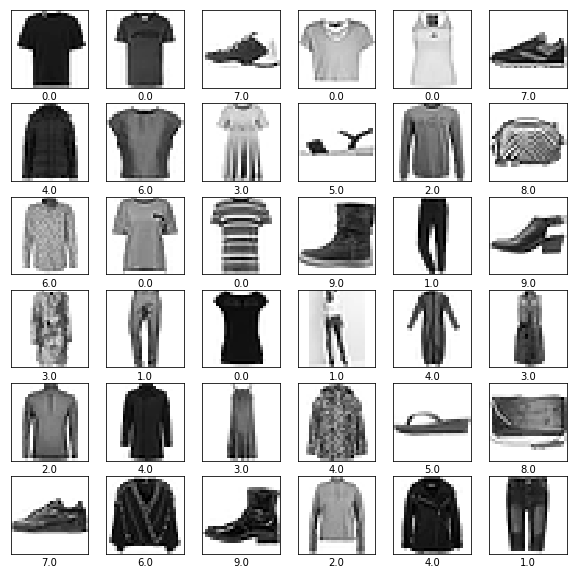

In [4]:
plt.figure(figsize=(10,10))
random_inds = np.random.choice(60000,36)
for i in range(36):
    plt.subplot(6,6,i+1)
    plt.xticks([])
    plt.yticks([])
    image_ind = random_inds[i]
    plt.imshow(np.squeeze(train_images[image_ind]), cmap=plt.cm.binary)
    plt.xlabel(train_labels[image_ind])

In [5]:
# Some matplottery for plotting test results...

def plot_image_prediction(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(np.squeeze(img), cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                                100*np.max(predictions_array),
                                true_label),
                                color=color)

def plot_value_prediction(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')


In [6]:
# Fully connected model for comparison:

def build_dense_model():
    dense_model = tf.keras.Sequential([
                                     tf.keras.layers.Flatten(),
                                     tf.keras.layers.Dense(256, activation = tf.nn.relu),
                                     tf.keras.layers.Dense(10, activation = tf.nn.softmax)
  ])
    return dense_model
dense_model = build_dense_model()

dense_model.compile(optimizer=tf.keras.optimizers.Adam(),
                    loss='sparse_categorical_crossentropy',
                    metrics = ['accuracy'])

dense_model.fit(train_images, train_labels, batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=2)

test_loss, test_acc = dense_model.evaluate(test_images, test_labels)

print('Test accuracy', test_acc)

Train on 60000 samples
Epoch 1/30
60000/60000 - 2s - loss: 0.5006 - accuracy: 0.8234
Epoch 2/30
60000/60000 - 2s - loss: 0.3757 - accuracy: 0.8648
Epoch 3/30
60000/60000 - 2s - loss: 0.3331 - accuracy: 0.8794
Epoch 4/30
60000/60000 - 2s - loss: 0.3111 - accuracy: 0.8862
Epoch 5/30
60000/60000 - 2s - loss: 0.2916 - accuracy: 0.8928
Epoch 6/30
60000/60000 - 2s - loss: 0.2756 - accuracy: 0.8988
Epoch 7/30
60000/60000 - 2s - loss: 0.2614 - accuracy: 0.9038
Epoch 8/30
60000/60000 - 2s - loss: 0.2541 - accuracy: 0.9049
Epoch 9/30
60000/60000 - 2s - loss: 0.2417 - accuracy: 0.9104
Epoch 10/30
60000/60000 - 2s - loss: 0.2316 - accuracy: 0.9128
Epoch 11/30
60000/60000 - 2s - loss: 0.2228 - accuracy: 0.9171
Epoch 12/30
60000/60000 - 2s - loss: 0.2152 - accuracy: 0.9201
Epoch 13/30
60000/60000 - 2s - loss: 0.2080 - accuracy: 0.9228
Epoch 14/30
60000/60000 - 2s - loss: 0.2008 - accuracy: 0.9248
Epoch 15/30
60000/60000 - 2s - loss: 0.1940 - accuracy: 0.9276
Epoch 16/30
60000/60000 - 2s - loss: 0.18

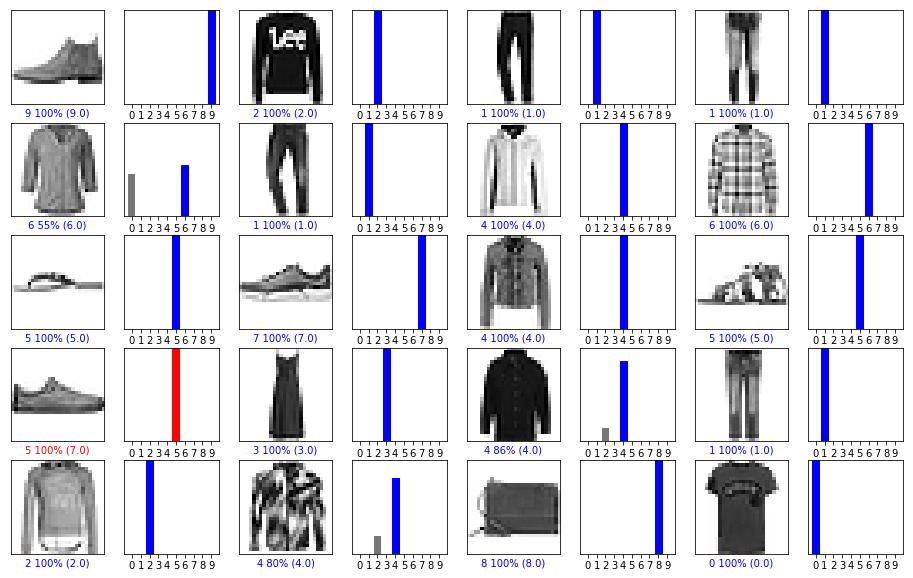

In [7]:
# Plots the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red

predictions = dense_model.predict(test_images)

num_rows = 5
num_cols = 4
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image_prediction(i, predictions, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_prediction(i, predictions, test_labels.astype(int))

In [8]:
# Convolutional model:

def build_conv_model():
    conv_model = tf.keras.Sequential([
                                     tf.keras.layers.Conv2D(32, 5, padding='same', activation='relu'),
                                     tf.keras.layers.MaxPool2D(),

                                     tf.keras.layers.Conv2D(64, 5, padding='same', activation='relu'),
                                     tf.keras.layers.MaxPool2D(),
                                     tf.keras.layers.Dropout(0.4),
                                    
                                     tf.keras.layers.Flatten(),
        
                                     tf.keras.layers.Dense(256, activation='relu'),
                                     tf.keras.layers.Dropout(0.4),
                                     tf.keras.layers.Dense(10, activation='softmax')
  ])
    return conv_model
conv_model = build_conv_model()

conv_model.compile(optimizer='adam',
                    loss='sparse_categorical_crossentropy',
                    metrics = ['accuracy'])

conv_model.fit(train_images, train_labels, batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=2)

test_loss, test_acc = conv_model.evaluate(test_images, test_labels)

print('Test accuracy', test_acc)

Train on 60000 samples
Epoch 1/30
60000/60000 - 7s - loss: 0.4858 - accuracy: 0.8237
Epoch 2/30
60000/60000 - 5s - loss: 0.3260 - accuracy: 0.8811
Epoch 3/30
60000/60000 - 5s - loss: 0.2857 - accuracy: 0.8948
Epoch 4/30
60000/60000 - 5s - loss: 0.2584 - accuracy: 0.9043
Epoch 5/30
60000/60000 - 5s - loss: 0.2395 - accuracy: 0.9114
Epoch 6/30
60000/60000 - 5s - loss: 0.2231 - accuracy: 0.9166
Epoch 7/30
60000/60000 - 5s - loss: 0.2111 - accuracy: 0.9207
Epoch 8/30
60000/60000 - 5s - loss: 0.1998 - accuracy: 0.9246
Epoch 9/30
60000/60000 - 6s - loss: 0.1919 - accuracy: 0.9278
Epoch 10/30
60000/60000 - 5s - loss: 0.1835 - accuracy: 0.9293
Epoch 11/30
60000/60000 - 5s - loss: 0.1760 - accuracy: 0.9334
Epoch 12/30
60000/60000 - 5s - loss: 0.1684 - accuracy: 0.9353
Epoch 13/30
60000/60000 - 5s - loss: 0.1614 - accuracy: 0.9375
Epoch 14/30
60000/60000 - 5s - loss: 0.1565 - accuracy: 0.9405
Epoch 15/30
60000/60000 - 5s - loss: 0.1490 - accuracy: 0.9431
Epoch 16/30
60000/60000 - 6s - loss: 0.14

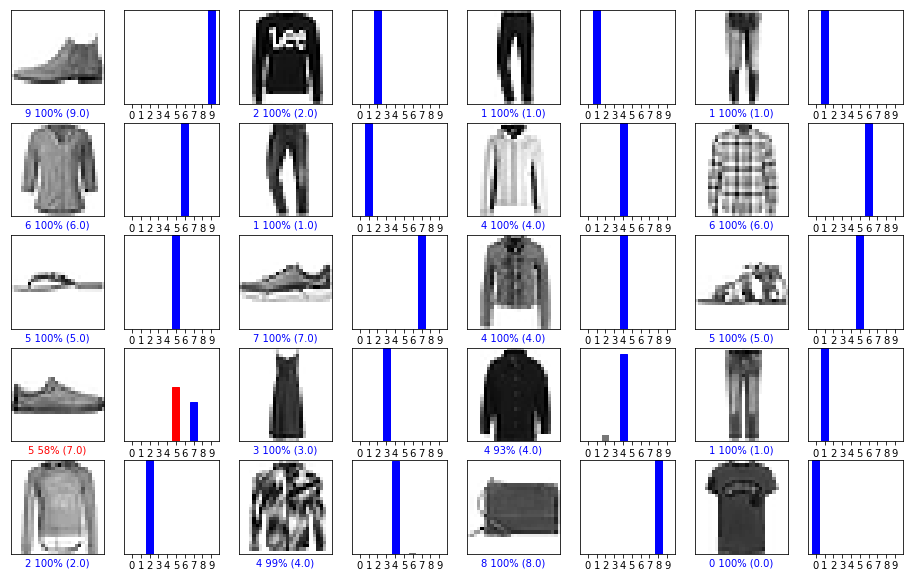

In [9]:
# Plots the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
predictions = conv_model.predict(test_images)

num_rows = 5
num_cols = 4
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image_prediction(i, predictions, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_prediction(i, predictions, test_labels.astype(int))
